<h1 style="text-align:center">Stroke Event Analysis</h1>

In [2]:
Image(url='https://www.clevelandheartlab.com/wp-content/uploads/2015/12/b-4.28.15-full-1350x650.jpg')

### Data Details:

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately <font color='red'>**11%**</font> of total deaths.This dataset is used to analyze in depth key factors that may be contributing to stroke events based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.ticker as ticker

from IPython.display import Image
from IPython.core.display import HTML
%matplotlib inline

### Dataframe Structure:

This dataset contains over 5,000 datapoints regarding stroke events with attributes that are  considered major factors in contributing to stroke instances around the globe. This healthcare dataset will be utlized along with data visualizations to demonstrate relationships or correlations between attributes. This analysis will demonstrate the impact of each attribute on stroke events, along with predictive trends/patterns.

**Attributes:**
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

In [3]:
# Loading dataframe with stroke healthcare data
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')

### Data Cleaning:

Original dataframe **stroke_data** is refined/cleaned by removing ambigous and unknown values. New dataframe is created **stroke_refined** to create a more accurate analysis on stroke events. The affected attributes consist of **[smoking_status], [bmi], and [gender]**. Dataframe query() function completes the desired filtering process using conditional statement, along with using dropna().

In [4]:
stroke_refined = stroke_data.query('gender!="Other" & smoking_status!="Unknown"')
stroke_refined = stroke_refined.dropna()
stroke_refined

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


### Hypertension, Heart Disease, and Strokes Associated With Gender:

This figure demonstrates the frequency of stroke events, hypertension, and heart disease attributes according to each gender group. A minor conclusion can be made based on this simple chart where women appear to have a higher stroke rate along with a higher hypertension rate [Strokes Associated with Women](#ref). Not enough information is available on this chart to make solid conclusions but provides information regarding a possible relationship between strokes and hypertension. Heart disease is also a key factor and is presented with a higher frequency for men and could also be a main contributor to strokes. Hypertension is a attrubute of interest and could be a main trigger for stroke events [The dangers of high blood pressure](#ref). 

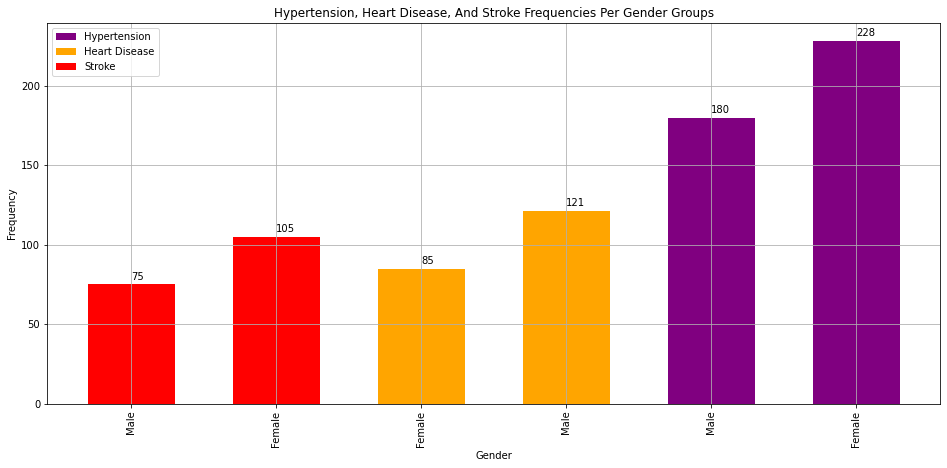

In [5]:
# Grouping target feilds by gender
gender_groups = stroke_refined.groupby('gender').sum()[['hypertension','heart_disease','stroke']]

fig, ax = plt.subplots(figsize =(16, 7)) 
x = np.arange(0, len(gender_groups.index))
rec1= ax.bar(x-1,gender_groups['hypertension'].sort_values(),color='purple',width=0.6,label='Hypertension')
rec2 = ax.bar(x-3,gender_groups['heart_disease'].sort_values(),color='orange',width=0.6,label='Heart Disease')
rec3 = ax.bar(x-5,gender_groups['stroke'].sort_values(),color='red',width=0.6,label='Stroke')

# Custom labels for each subgroup
labels = ['Male','Female','Female','Male','Male','Female']
x_ticks = [-5, -4, -3, -2, -1, 0]
plt.title('Hypertension, Heart Disease, And Stroke Frequencies Per Gender Groups')
plt.xticks(x_ticks, labels, rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.legend()
plt.grid()

# Function to annotate each bar
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='left', va='bottom')
        
# Invoke annotation method on each group plot
autolabel(rec1)
autolabel(rec2)
autolabel(rec3)

### Stroke Events Associated with Smoking Status:

Smoking status is observed and is known to be a major factor in contributing to many health conditions, including heart issues but findings have demonstrated little correlation between smokers and stroke events for this dataset. A smoking status bar chart is generated which provides frequencies for **hypertension, heart disease, and strokes** in connection to smoking status. The smoking status of **'smoker'** contains a small portion of the target data and doesnt seem to be a main contributor to stroke events. The smoking status of **'never smoked'** contains the largest frequencies in all target attributes with an obvious dominant frequency related to hypertension events.

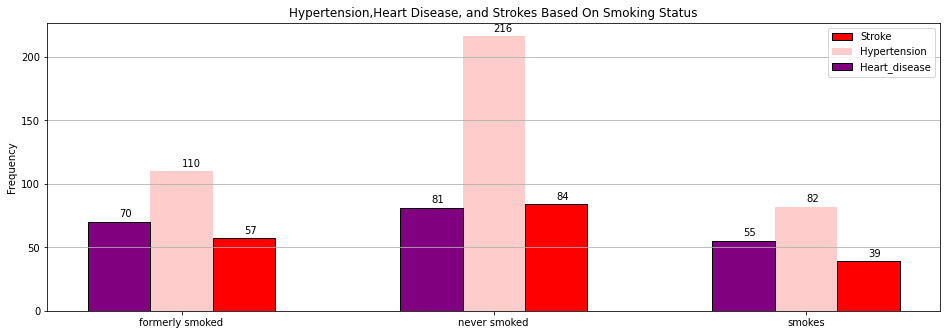

In [6]:
# Grouping smoking statuses by stroke frequency
smoke_groups = stroke_refined.groupby('smoking_status').sum()[['stroke','hypertension','heart_disease']]

fig, ax = plt.subplots(figsize =(16, 5.3))
x = np.arange(0, len(smoke_groups.index))
rec1= ax.bar(x+0.2,smoke_groups['stroke'],color='red',width=0.2,label='Stroke',edgecolor='black',linewidth=1)
rec2 = ax.bar(x,smoke_groups['hypertension'],color='red',width=0.2,alpha=0.2,label='Hypertension')
rec3 = ax.bar(x-0.2,smoke_groups['heart_disease'],color='purple',width=0.2,
              edgecolor='black',linewidth=1,label='Heart_disease')
plt.title('Hypertension,Heart Disease, and Strokes Based On Smoking Status')
plt.ylabel('Frequency')
plt.xticks(x, smoke_groups.index)
plt.legend()
plt.grid(axis='y')

# Invoke labeling function
autolabel(rec1)
autolabel(rec2)
autolabel(rec3)

### Stroke Events Isolated By Smoker Status: 

Based on the results from isolating smoker status and producing percentages per group, we can conclude that smoking isnt the major factor in stroke events in the dataset. Although this can be a factor in stroke events, smoking status alone doesnt provide enough evidence of being strongly correlated to strokes in this healthcare dataset. Here we can see 3 seperate pie charts which show portions for **stroke vs non stroke events** in relation to smoking status and clearly demonstrates that **non stroke events** are dominant. Stroke events make a small percentage in every smoking status category and we can clearly see how most individuals with any type of smoking status dont experience a stroke.

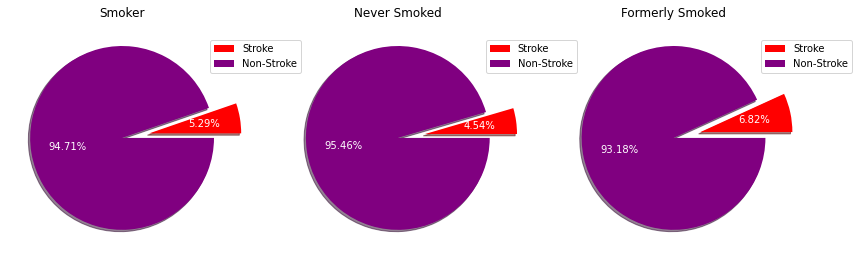

In [7]:
# Isolating different smoker status groups.
g1 = stroke_refined.loc[(stroke_refined['smoking_status'] == 'smokes') & (stroke_refined['stroke'] == 1)].count()[0]
g2 = stroke_refined.loc[(stroke_refined['smoking_status'] == 'smokes') & (stroke_refined['stroke'] == 0)].count()[0]

g3 = stroke_refined.loc[(stroke_refined['smoking_status'] == 'never smoked') & (stroke_refined['stroke'] == 1)].count()[0]
g4 = stroke_refined.loc[(stroke_refined['smoking_status'] == 'never smoked') & (stroke_refined['stroke'] == 0)].count()[0]

g5 = stroke_refined.loc[(stroke_refined['smoking_status'] == 'formerly smoked') & (stroke_refined['stroke'] == 1)].count()[0]
g6 = stroke_refined.loc[(stroke_refined['smoking_status'] == 'formerly smoked') & (stroke_refined['stroke'] == 0)].count()[0]

pie_labels1 = ('Stroke', 'Non-Stroke')
colors = ['red', 'purple']

plt.figure(figsize=(14,11))
# Smoker status of 'Smoker' pie chart comparing 'stroke' vs 'non-stroke' frequencies
ax4 = plt.subplot(2,3,1)
ax4.pie([g1,g2],autopct='%.2f%%', shadow=True, colors=colors,explode=(0.3,0),textprops={'color':"w"})
ax4.legend(pie_labels1,loc='upper right',bbox_to_anchor=(1.3,.95))
ax4.set_title('Smoker')

# Smoker status of 'Never Smoked' pie chart comparing 'stroke' vs 'non-stroke' frequencies
ax5 = plt.subplot(2,3,2)
ax5.pie([g3,g4],autopct='%.2f%%', shadow=True, colors=colors,explode=(0.3,0),textprops={'color':"w"})
ax5.legend(pie_labels1,loc='upper right',bbox_to_anchor=(1.3,.95))
ax5.set_title('Never Smoked')

# Smoker status of 'Formerly Smoked' pie chart comparing 'stroke' vs 'non-stroke' frequencies
ax6 = plt.subplot(2,3,3)
ax6.pie([g5,g6],autopct='%.2f%%', shadow=True, colors=colors,explode=(0.3,0),textprops={'color':"w"})
ax6.legend(pie_labels1,loc='upper right',bbox_to_anchor=(1.3,.95))
ax6.set_title('Formerly Smoked')
plt.show()

###  BMI Index Values and Obesity:

The BMI index attribute is analyzed with a histogram to demonstrate a distribution among all BMI values located in the healthcare dataset. Based on the BMI index charts, a conclusion has been made regarding a strong correlation between BMI values and strokes. The bmi attribute shows strong evidence of overweight - extreme obesity being a main contributor to stroke events [BMI value information](#ref). The histogram generated from bmi values provides a clear view of bmi ranges in this dataset with a mean bmi of **30.29%** which clearly shows a large portion of individuals being obese and most being at to the **27** bmi indicator. This histogram shows BMI distribution among entire dataset which includes BMI interval **[11.5 - 95]** which can be considred extreme values and will refine this interval further into this analysis.

In [8]:
Image(url= "https://www.indushealthplus.com/media/article_img/how-genetics-and-bmi-is-connected.jpg", width=1000)

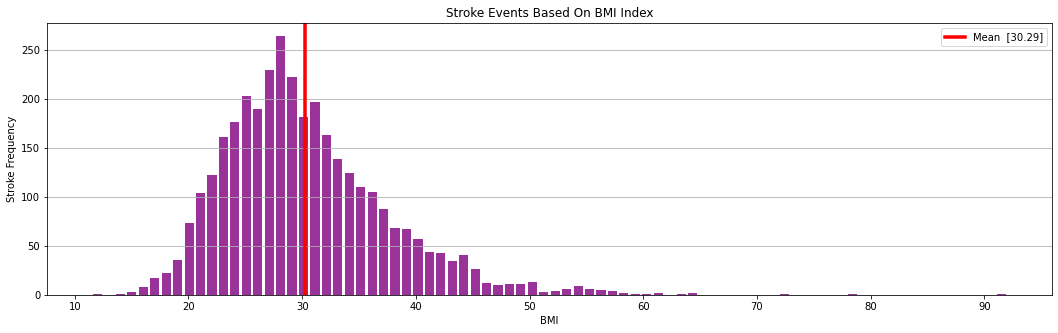

In [9]:
plt.figure(figsize=(18, 5))
bmi_mean = round(stroke_refined['bmi'].mean(),2)
ax7 = plt.hist(stroke_refined.bmi, bins= 80, color='purple',alpha=0.8,rwidth=0.8)
ax7 = plt.axvline(bmi_mean, color='red', linewidth=3.5, label='Mean  ['+str(bmi_mean)+']')
plt.title('Stroke Events Based On BMI Index')
plt.xlabel('BMI')
plt.ylabel('Stroke Frequency')
plt.legend()
plt.grid(axis='y')


###  BMI Index Values and Obesity > 25:

This data visual consists of multiple subplots involving target attributes such as **Hypertension, Heart Disease, Strokes**. The stroke scatter plot focuses on BMI interval **[BMI > 25]** on a sub dataset containing all cases with stroke events being True, resulting in **83.3%** of stroke cases. A concentration of datapoints is visible and marked on interval **[25.5 - 32.26]**. This datapoint density is analyzed further and subplots in relations to Hypertension, Heart Disease, and Glucose levels are generated with a focus on the dense stroke interval of **[25.5 - 32.26]**.

The Hypertension subplot clearly shows an active/high frequency in the concentrated stroke event interval. This BMI span contains many spikes in hypertension and shows a possible strong correlation between strokes and hypertension attributes making a total of **29.2%** of stroke events on **[25.5 - 32.26]** having hypertension.

The Heart Disease subplot shows a lower frequency in the concentrated stroke event interval. This BMI span contains a few spikes in Heart Disease which alone shows minor correlation between strokes and Heart Disease attributes making a total of **21.3%** of stroke events on **[25.5 - 32.26]** having Heart Disease.


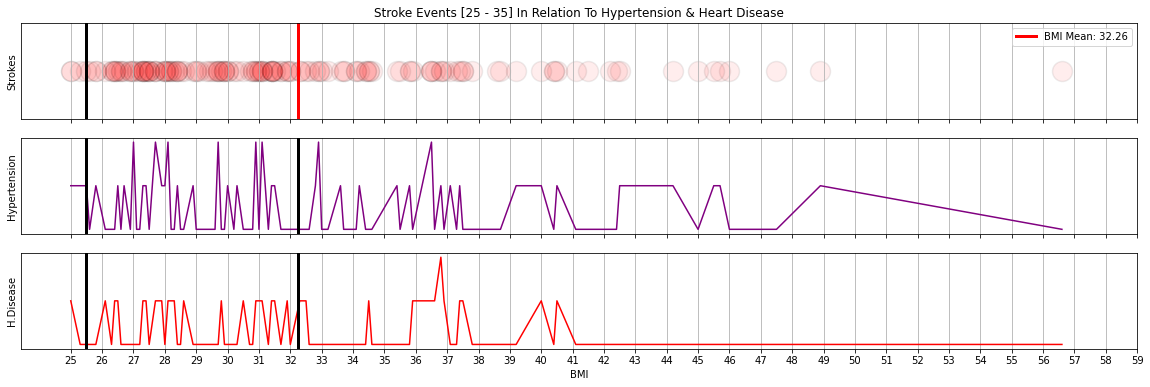

In [10]:
# Filtering dataframe with individuals containing bmi >= to 25 (overweight - obesity)
bmi_stroke = stroke_refined.loc[(stroke_refined['bmi'] >= 25) & (stroke_refined['stroke'] == 1)]

# Inserting MEAN line of stroke events
bmi_mean = round(bmi_stroke['bmi'].mean(),2)

# Stroke frequency plot with focus in datapoint density.
plt.figure(figsize=(20, 6))
x_ticks = np.arange(25, 60, 1)
y_ticks = np.arange(50, 800, 100)
ax8 = plt.subplot(3,1,1)
ax8 = plt.scatter(bmi_stroke.bmi, bmi_stroke.stroke, alpha=0.07, s=400, edgecolor='black', c='red',linewidths=1.5)
ax8 = plt.axvline(bmi_mean, color='red', linewidth=3, label="BMI Mean: "+str(bmi_mean))
ax8 = plt.axvline(25.5,color='black', linewidth=3)
plt.tick_params(labelbottom=False) 
plt.yticks([])
plt.xticks(x_ticks)
plt.ylabel('Strokes')
plt.grid()
plt.legend()
plt.title('Stroke Events [25 - 35] In Relation To Hypertension & Heart Disease')

# Grouping key factors of stroke events by BMI
bmi_groups = bmi_stroke.groupby('bmi').sum()[['stroke','hypertension','heart_disease','avg_glucose_level','age']]

# Hpertension frequency plot in relation to Stroke Events concentrated on points between 25.5 - 32.26
ax9 = plt.subplot(3,1,2)
ax9 = plt.plot(bmi_groups['hypertension'],color='purple')
ax9 = plt.axvline(25.5, color='black', linewidth=3)
ax9 = plt.axvline(bmi_mean, color='black', linewidth=3)
plt.tick_params(labelbottom=False) 
plt.yticks([])
plt.xticks(x_ticks)
plt.ylabel('Hypertension')
plt.grid()

# Heart Disease frequency plot in relation to Stroke Events concentrated on points between 25.5 - 32.26
ax10 = plt.subplot(3,1,3)
ax10 = plt.plot(bmi_groups['heart_disease'],color='red')
ax10 = plt.axvline(25.5, color='black', linewidth=3)
ax10 = plt.axvline(bmi_mean, color='black', linewidth=3) 
plt.yticks([])
plt.xticks(x_ticks)
plt.xlabel('BMI')
plt.ylabel('H.Disease')
plt.grid()
plt.show()

### High Glucose Levels & Hypertension Associated With BMI:

Glucose levels are major contributors to stroke events and can vary in healthy/unhealthy levels depending on different types of diabetic types which arent present in this dataset. Healthy and Unhealthy levels can vary depending on **Pre-Diabetics, Type I Diabbetes, or Type II Diabetes** [[High/Low Glucose levels]](#ref).These glucose levels can be highly influenced by a fasting state per individual along with other attributes not present in this dataset but can conclude that the majority of stroke events are related to **High glucose levels** and **Hypertension** as seen in previous chart related to concentrated stroke events.

We can see that the mean Glucose level resided at **241** which is considered to be very high and contributes to heart disease and strokes. The glucose scatter plot shows how most stroke events have very low/high glucose levels which could be triggering hypertension and eventually leading to strokes.The hypertension chart also shows evidence of many individuals having Hypertension in relation to glucose levels. Both charts appear to share similiar spikes on interval **[25.5 - 37]** which contain the most concentrated stroke events as seen on the previous stroke density chart.

**Stroke Event Conclusion:**

Hypertension and Glucose Level monitoring can be an effective way to prevent or predict stroke events but also have to take into consideration existing conditions such as **Heart Disease,Pre-Diabetics, Type I Diabbetes, or Type II Diabetes**. These conditions are major influencers on healthy/unhealthy glucose levels which could lead to hypertension and eventually trigger strokes.We can conclude that hypertension is a key attribute in stroke events for this healthcare dataset but must take into consideration glucose levels along with pre-existing conditions.

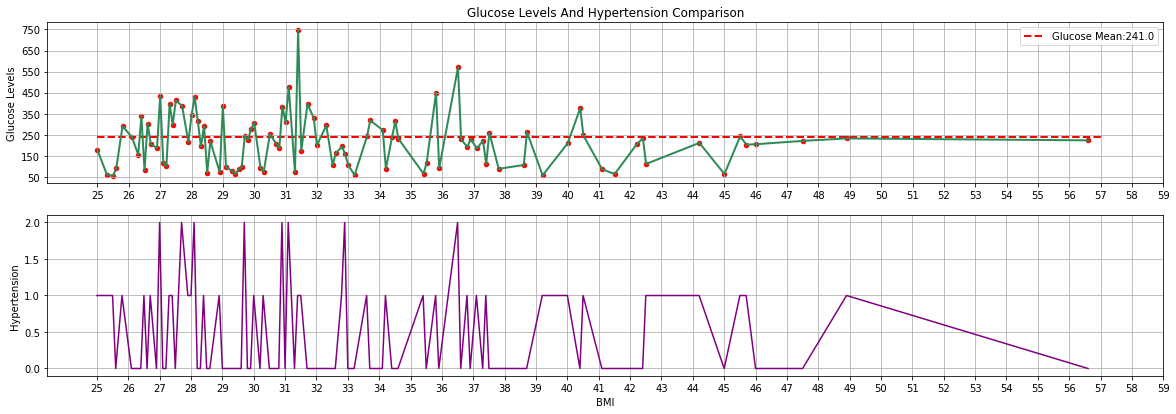

In [11]:
# Glucose Levels plot/scatter related to BMI values.
plt.figure(figsize=(20, 6.5))
ax11 = plt.subplot(2,1,1)
glucose_mean = bmi_groups[(bmi_groups.index >=25.5) & (bmi_groups.index <= bmi_mean)]
glucose_mean = round(glucose_mean['avg_glucose_level'].mean(),0)
ax11 = plt.plot(bmi_groups['avg_glucose_level'],color='seagreen', linewidth=2)
ax11 = plt.scatter(bmi_groups.index, bmi_groups.avg_glucose_level,color='red', s=80,marker='.')
plt.hlines(y=glucose_mean, xmin=25, xmax=57, linewidth=2, color='red', 
           linestyle='--',label='Glucose Mean:' + str(glucose_mean))
plt.title('Glucose Levels And Hypertension Comparison')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.ylabel('Glucose Levels')
plt.legend()
plt.grid()

# Hpertension frequency plot in relation to Stroke Events concentrated on points between 25.5 - 32.26
ax12 = plt.subplot(2,1,2)
ax12 = plt.plot(bmi_groups['hypertension'],color='purple') 
plt.xticks(x_ticks)
plt.xlabel('BMI')
plt.ylabel('Hypertension')
plt.grid()
plt.show()

### References:

<a id='ref'></a>
High Blood Sugar, Diabetes, and Your Body? Read and dicover more vital information about normal and low/high glucose levels by visiting the following source.
- Source: https://www.webmd.com/diabetes/how-sugar-affects-diabetes

What are normal glucose levels? 
- Source : https://www.virginiamason.org/whatarenormalbloodglucoselevels

Learn more about the dangers regarding Hypertension/High blood pressure.  
- Source: https://www.cdc.gov/healthyweight/assessing/bmi/index.html

BMI Index values can be explained in depth by visiting the following sources. 
- Source: https://www.cdc.gov/bloodpressure/about.htm

Women are at higher risk of having strokes? Visit the following sources which provide details behind why women might be at higher risk of experiencing strokes:

- Source 1: https://www.stroke.org/en/about-stroke/stroke-risk-factors/women-have-a-higher-risk-of-stroke

- Source 2: https://utswmed.org/medblog/stroke-symptoms-women-risk/
